In [1]:
import tensorflow as tf
from tensorflow import keras

Fashion MNIST number classification load

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images_full, train_labels_full), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
X_valid, X_train = train_images_full[:5000]/255, train_images_full[5000:]/255
y_valid, y_train = train_labels_full[:5000], train_labels_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [5]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [6]:
history =  model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 4s 1ms/step - loss: 0.7140 - accuracy: 0.7671 - val_loss: 0.5065 - val_accuracy: 0.8324
Epoch 2/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4891 - accuracy: 0.8295 - val_loss: 0.4554 - val_accuracy: 0.8492
Epoch 3/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4443 - accuracy: 0.8435 - val_loss: 0.4309 - val_accuracy: 0.8494
Epoch 4/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4161 - accuracy: 0.8542 - val_loss: 0.4198 - val_accuracy: 0.8614
Epoch 5/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3968 - accuracy: 0.8601 - val_loss: 0.3910 - val_accuracy: 0.8688
Epoch 6/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3799 - accuracy: 0.8646 - val_loss: 0.4148 - val_accuracy: 0.8554
Epoch 7/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3658 - accuracy: 0.8705 - val_loss: 0.3577 - val_accuracy:

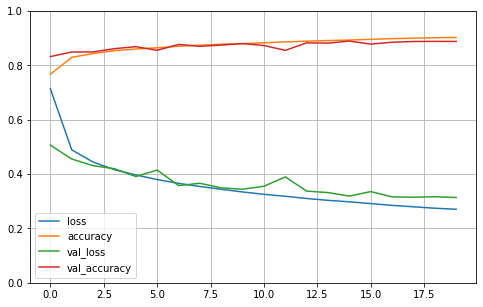

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [9]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 61.9225 - accuracy: 0.8468


[61.922542572021484, 0.8468000292778015]

Regression MLP on housing prices

In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)